# Ejercicio - Generacion de Puts/Calls sinteticas / Busqueda de 'irregularidades'

### PROBLEMAS: 

#### 1) Se quiere operar en un Put (o Call) que no existe en el mercado por la razon de inversion/riesgo que sea, sin embargo dicho Put (Call) no esta en el mercado.  
#### 2) Se quiere investigar posibles desfazajes de Puts y Calls 


La idea de este ejercicio es tomar un ticker en el mercado (ARG o US), obtener el panel de opciones, completarlo con datos de tasa y de dividendos y 'completarlo' con las opciones que no esten disponibles en el mercado usando sinteticas ayudados de la relacion Put-Call parity.







## 1) Obtencion del panel de opciones de un ticker del mercado [Dificultad 1]

Para este paso pueden usar los modulos data_nyse o data_byma vistos en clase. Pueden usar la version clean del metodo o pueden generarse el panel como les guste, agregando columnas de mercado o generadas por ustedes.

Ejemplos 

Tickers
ARG: 'GGAL'
USA: 'AAPL'


## Empieza la resolucion. Importo los modulos que trabajamos en clase

In [1]:
#from data_byma import *

from data_nyse import *

from data_byma import *

 ### Para el caso NYSE, elijo un activo

In [12]:
# paneles NYSE
ticker = 'GGAL'
panel_opciones = obtener_panel_opciones_nyse(ticker, clean_flag = True)
panel_opciones.head(10)




,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,impliedVolatility,Ask,Bid
0,GGAL210716C00005000,GGAL,8.6,C,5.0,2,3.20,1.720000,0.500005,3.70,3.50
1,GGAL210716P00005000,GGAL,8.6,P,5.0,2,0.05,1.720000,5.875003,0.55,0.00
2,GGAL210716C00007500,GGAL,8.6,C,7.5,2,0.90,1.146667,1.562502,1.20,0.75
3,GGAL210716P00007500,GGAL,8.6,P,7.5,2,0.05,1.146667,1.414065,0.15,0.00
4,GGAL210716C00010000,GGAL,8.6,C,10.0,2,0.05,0.860000,1.093755,0.05,0.00
5,GGAL210716P00010000,GGAL,8.6,P,10.0,2,1.50,0.860000,1.281254,1.45,1.30
6,GGAL210716C00012500,GGAL,8.6,C,12.5,2,0.03,0.688000,2.218754,0.05,0.00
7,GGAL210716P00012500,GGAL,8.6,P,12.5,2,4.94,0.688000,0.000010,2.90,2.60
8,GGAL210716C00015000,GGAL,8.6,C,15.0,2,0.10,0.573333,0.500005,0.00,0.00
9,GGAL210716P00015000,GGAL,8.6,P,15.0,2,7.32,0.573333,5.867190,7.00,6.70


### Para el caso BYMA, elijo un activo

In [7]:
# paneles BYMA
ticker = 'GGAL'

panel_opciones = obtener_panel_opciones_byma(ticker, clean_flag = True)
panel_opciones.head(10)

AttributeError: 'NoneType' object has no attribute 'find_all'

## 2) Obtencion de curva de tasa para cada maturity o TTM o expiracion [Dificultad 2]

En clase hay un ejemplo de generacion de curva 'risk free' usando las tasas Libor e interpolandolas. Pueden usar otras curvas de descuento. En el caso Argentina pueden usar curva de caucion, curva Badlar, investigar el tema.Siguiendo con el dataframe del panel, se generaria una columna nueva con la tasa a usar para ese TTM/madurez. 

Ejemplos (guia, se pueden proponer otros)

USA:https://www.global-rates.com/interest-rates/libor/libor.aspx


ARG: 

BADLAR: https://www.bcra.gob.ar/PublicacionesEstadisticas/Principales_variables_datos.asp?serie=1222&detalle=BADLAR%20en%20pesos%20de%20bancos%20privados%20(en%20%%20n.a.)

CAUCIONES: https://www.invertironline.com/mercado/cotizaciones/argentina/cauciones



### Habria que generar un codigo que a cada maturity busque la tasa correspondiente (por ejemplo caucion)

In [ ]:
#AQUI CODIGO
#E

panel_opciones_byma['Tasa'] = 0.30




## 3) Obtencion de dividendo / curva de dividendos para cada maturity o TTM o expiracion [Dificultad 1-2]

En clase hay un ejemplo de obtencion del dividend yield usando yfinance. Pueden usar otros modelos que usen las fechas de los posibles pagos de dividendos y la estimacion u otras fuentes de datos para el caso Argentino. Siguiendo con el dataframe del panel, se generaria una columna nueva con el dividend yield a usar para ese TTM/madurez.

ARG: 
https://es.investing.com/equities/grupo-financiero-galicia-sa-adr-dividends

US (modulo yfinance): 
ticker = 'AAPL'
data = yf.Ticker(ticker)
div = float(data.info['dividendYield'])



### Research de dividendo GGAL

In [ ]:
#AQUI CODIGO
#https://academiasimple.com/empresas-que-pagan-dividendo-en-argentina/

div = 0.0
panel_opciones_byma['Div'] = div


## 4) Buscar Calls para las que no haya Puts (o Puts para las que no haya Calls) en el panel y generarl aproximaciones sinteticamente usando la paridad Put Call para tener un panel 'completo'  [Dificultad 2]

En el caso de una Europea con tasa de dividendos div: $$C(0)-P(0) = S(0)e^{-divT} - K e^{-rT}$$ 


Mas de Put-Call parity: https://financialmathmodels.wordpress.com/2015/05/16/put-call-parity-part-2/

### Mi approach para mostrarles hoy es 'fuerza-bruta' pero vi resoluciones mas piolas que solo se quedaban con aquellas opciones que no tenian par

### Agrego columnas de precio medio (que no venia en la base) y del tipo de opcion 'sintetica' y del precio de la misma - que calculare usando PC Parity

In [95]:
#AQUI CODIGO

import math
panel_opciones_byma['Sintetico_tipo'] = ''
panel_opciones_byma['Sintetico_precio'] = 0.0
panel_opciones_byma = panel_opciones_byma.sort_values(by=['TTM','Strike'], inplace=False )

panel_opciones_byma = panel_opciones_byma[panel_opciones_byma.Last>0]

panel_opciones_byma = panel_opciones_byma.reset_index(drop=True)


panel_opciones_byma



,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,Tasa,Div,Sintetico_tipo,Sintetico_precio
0,PAMC55.0OC,PAMP,64.2,C,55.0,10,9.40,1.167273,0.3,0.0,,0.0
1,PAMV59.0OC,PAMP,64.2,P,59.0,10,0.23,1.088136,0.3,0.0,,0.0
2,PAMC61.0OC,PAMP,64.2,C,61.0,10,4.30,1.052459,0.3,0.0,,0.0
3,PAMC65.0OC,PAMP,64.2,C,65.0,10,1.91,0.987692,0.3,0.0,,0.0
4,PAMC67.0OC,PAMP,64.2,C,67.0,10,1.29,0.958209,0.3,0.0,,0.0
5,PAMV55.0DI,PAMP,64.2,P,55.0,73,1.00,1.167273,0.3,0.0,,0.0
6,PAMC65.0DI,PAMP,64.2,C,65.0,73,7.00,0.987692,0.3,0.0,,0.0
7,PAMC71.0DI,PAMP,64.2,C,71.0,73,3.80,0.904225,0.3,0.0,,0.0
8,PAMC73.0DI,PAMP,64.2,C,73.0,73,3.00,0.879452,0.3,0.0,,0.0


### Ahora es donde las lleno usando paridad put call - me quedo con aquellos precios positivos y me saco de encima precios negativos (puede haber)

In [96]:
for idx in list(panel_opciones_byma.index):
    if panel_opciones_byma.CallPut.values[idx] == 'C':
        #print('Sintetico es Put')
        panel_opciones_byma.Sintetico_tipo.values[idx] = 'P'
        panel_opciones_byma.Sintetico_precio.values[idx] = panel_opciones_byma.Last.values[idx] - panel_opciones_byma.Spot.values[idx] * math.exp(-panel_opciones_byma.Div.values[idx] * panel_opciones_byma.TTM.values[idx]/365) + panel_opciones_byma.Strike.values[idx] * math.exp(-panel_opciones_byma.Tasa.values[idx] * panel_opciones_byma.TTM.values[idx]/365) 
    else:
        #print('Sintetico es Call')
        panel_opciones_byma.Sintetico_tipo.values[idx] = 'C'
        panel_opciones_byma.Sintetico_precio.values[idx] = panel_opciones_byma.Last.values[idx] + panel_opciones_byma.Spot.values[idx] * math.exp(-panel_opciones_byma.Div.values[idx] * panel_opciones_byma.TTM.values[idx]/365) - panel_opciones_byma.Strike.values[idx] * math.exp(-panel_opciones_byma.Tasa.values[idx] * panel_opciones_byma.TTM.values[idx]/365) 

        
        
        
#panel_opciones_byma = panel_opciones_byma[panel_opciones_byma.Sintetico_precio>0]      

In [97]:
panel_opciones_byma

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,Tasa,Div,Sintetico_tipo,Sintetico_precio
0,PAMC55.0OC,PAMP,64.2,C,55.0,10,9.40,1.167273,0.3,0.0,P,-0.250202
1,PAMV59.0OC,PAMP,64.2,P,59.0,10,0.23,1.088136,0.3,0.0,C,5.912944
2,PAMC61.0OC,PAMP,64.2,C,61.0,10,4.30,1.052459,0.3,0.0,P,0.600685
3,PAMC65.0OC,PAMP,64.2,C,65.0,10,1.91,0.987692,0.3,0.0,P,2.177943
4,PAMC67.0OC,PAMP,64.2,C,67.0,10,1.29,0.958209,0.3,0.0,P,3.541572
5,PAMV55.0DI,PAMP,64.2,P,55.0,73,1.00,1.167273,0.3,0.0,C,13.402951
6,PAMC65.0DI,PAMP,64.2,C,65.0,73,7.00,0.987692,0.3,0.0,P,4.014695
7,PAMC71.0DI,PAMP,64.2,C,71.0,73,3.80,0.904225,0.3,0.0,P,6.465282
8,PAMC73.0DI,PAMP,64.2,C,73.0,73,3.00,0.879452,0.3,0.0,P,7.548811


panel_opciones_byma

In [78]:
TTMs = list(set(panel_opciones_byma.TTM))
TTMs

[136, 73, 10]

In [84]:
panel_opciones_byma[panel_opciones_byma['TTM']==10]

,Especie,Ticker,Spot,CallPut,Strike,TTM,Last,Moneyness,Tasa,Div,Sintetico_tipo,Sintetico_precio
0,COMC2.14OC,COME,2.8,C,2.14,10,0.690,1.308411,0.4,0.0,P,0.006676
1,COMC2.301O,COME,2.8,C,3.30,10,0.499,0.848485,0.4,0.0,P,0.963033
2,COMV2.301O,COME,2.8,P,3.30,10,0.001,0.848485,0.4,0.0,C,-0.463033
3,COMC3.40OC,COME,2.8,C,3.40,10,0.010,0.823529,0.4,0.0,P,0.572943
4,COMC3.70OC,COME,2.8,C,3.70,10,0.009,0.756757,0.4,0.0,P,0.868673
5,COMC3.80OC,COME,2.8,C,3.80,10,0.005,0.736842,0.4,0.0,P,0.963584
6,COMC4.00OC,COME,2.8,C,4.00,10,0.004,0.700000,0.4,0.0,P,1.160404
7,COMC3.311O,COME,2.8,C,4.31,10,0.005,0.649652,0.4,0.0,P,1.468025
8,COMC3.432O,COME,2.8,C,5.43,10,0.010,0.515654,0.4,0.0,P,2.580818
9,COMC2.463O,COME,2.8,C,5.46,10,0.364,0.512821,0.4,0.0,P,2.964491


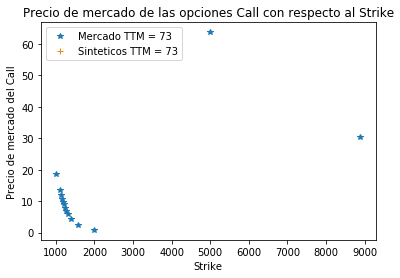

In [49]:
CP = "C"
TTM =73

precios_mercado=[]
precios_sinteticos=[]

from matplotlib import pyplot as plt
Ks1 = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.CallPut == CP)].Strike.values
precios_mercado = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.CallPut == CP)].Last.values

Ks2 = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.Sintetico_tipo == CP)].Strike.values
precios_sinteticos = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.Sintetico_tipo == CP)].Sintetico_precio.values


n=25

plt.plot(Ks1[1:n], precios_mercado[1:n],'*', label='Mercado TTM = '+str(TTM))
plt.plot(Ks2[1:n], precios_sinteticos[1:n],'+', label='Sinteticos TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

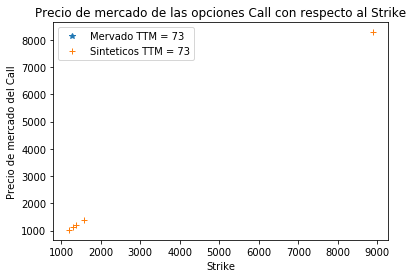

In [36]:
CP = "P"
TTM =73

precios_mercado=[]
precios_sinteticos=[]

from matplotlib import pyplot as plt
Ks1 = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.Tipo == CP)].Strike.values
precios_mercado = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.Tipo == CP)]['Último'].values

Ks2 = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.Sintetico_tipo == CP)].Strike.values
precios_sinteticos = panel_opciones_byma[(panel_opciones_byma.TTM == TTM) & (panel_opciones_byma.Sintetico_tipo == CP)].Sintetico_precio.values

n=25

plt.plot(Ks1[1:n], precios_mercado[1:n],'*', label='Mercado TTM = '+str(TTM))
plt.plot(Ks2[1:n], precios_sinteticos[1:n],'+', label='Sinteticos TTM = '+str(TTM))


plt.legend()

plt.xlabel('Strike')
plt.ylabel('Precio de mercado del Call')
plt.title('Precio de mercado de las opciones Call con respecto al Strike')
    
plt.show()

## 5) Para aquellos pares que si hay tanto Put como Call, analizar si se cumple la relacion y proponer alguna estrategia que podria arbitrar la irregularidad [Dificultad 3]

Por ejemplo analizar la tasa implicita y compararla con la tasa usada (caucion, badlar)

In [ ]:
#AQUI CODIGO